# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [47]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


### Задание 1
Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [15]:
from sklearn.linear_model import LinearRegression
direct_b = data['Direct_Bilirubin']
total_b = data['Total_Bilirubin']
model_b = LinearRegression()
result = model_b.fit(np.array(total_b).reshape(-1,1), direct_b)

print('intercept:', model_b.intercept_)

print('slope:', model_b.coef_)

intercept: 0.18116743679724845
slope: [0.39557996]


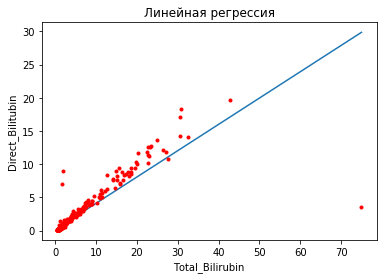

In [16]:
plt.xlabel('Total_Bilirubin')
plt.ylabel('Direct_Bilitubin')
plt.title('Линейная регрессия')
x = np.linspace(min(total_b), max(total_b), 100)
y = model_b.coef_*x + model_b.intercept_
plt.plot(x,y)
plt.plot(total_b, direct_b, 'r.')
plt.show()

In [18]:
#total равен 10.9, в таблице - 5.5, модель предсказывает 4.5
model_b.predict(np.array([10.9]).reshape(-1, 1))

array([4.49298903])

In [19]:
#total равен 7.3, в таблице - 4.1, модель предсказывает 3.0
model_b.predict(np.array([7.3]).reshape(-1, 1))

array([3.06890116])

In [21]:
#total равен 1.0, в таблице - 0.4, модель предсказывает 0.6
model_b.predict(np.array([1.0]).reshape(-1, 1))

array([0.5767474])

### Задание 2
Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

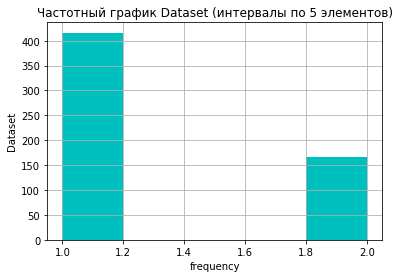

In [42]:
#Dataset имеет распределение Бернулли. Это не очень хорошие новости, т.к. могут быть проблемы с построением регрессии
n, bins, patches = plt.hist(data['Dataset'],5, facecolor='c')

plt.xlabel('frequency')
plt.ylabel('Dataset')
plt.title('Частотный график Dataset (интервалы по 5 элементов)')
plt.grid(True)
plt.show()

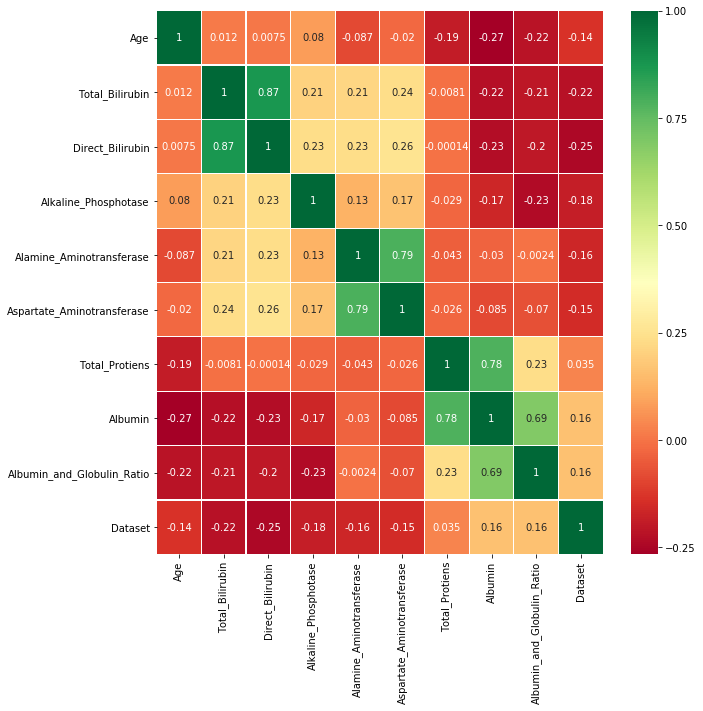

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
square=plt.gcf()
square.set_size_inches(10,10)
plt.show()
#нельзя сказать, что есть однозначно хорошие кандидаты для многомерной регрессии. Возьмем Direct_Bilirubin и Albumin

In [33]:
direct_b = data['Direct_Bilirubin']
albumin = data['Albumin']
dataset = data['Dataset']
x = np.vstack([np.array(direct_b), np.array(albumin)]).T

y = np.array(dataset)
model_mreg = LinearRegression().fit(x, y)

In [34]:
print('intercept:', model_mreg.intercept_)
print('slope:', model_mreg.coef_)
#плохие коэффициенты. наверняка это связано с тем, что dataset имеет распределение Бернулли

intercept: 1.1410072153790838
slope: [-0.03555641  0.06311015]


In [46]:
print('Предсказание модели: ', model_mreg.predict(x[2:4]))
#для строк 3 и 4 показатель Dataset действительно равен 1, корректно округляется до 1 для дискретного распределения

Предсказание модели:  [1.20348943 1.34135917]


In [52]:
print('Предсказание модели: ', model_mreg.predict(x[7:10]))
#а вот тут проблема. Второй показатель из трех должен быть равен 2 согласно данным, но он также округляется до 1,
# хоть и наибольший из всех. Последствия низкого r и дискретности целевого значения

Предсказание модели:  [1.35753685 1.38909192 1.34847046]


### Задание 3
Посчитать квартили для всех колонок. 

In [55]:
len(data)

583

In [57]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


### Задание 4
Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

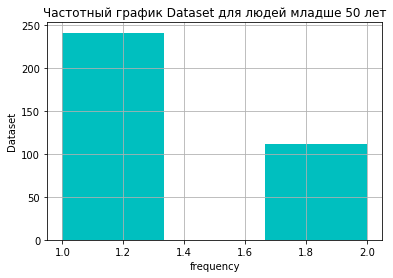

In [64]:
n, bins, patches = plt.hist(data[data['Age']<50]['Dataset'],3, facecolor='c')

plt.xlabel('frequency')
plt.ylabel('Dataset')
plt.title('Частотный график Dataset для людей младше 50 лет')
plt.grid(True)
plt.show()

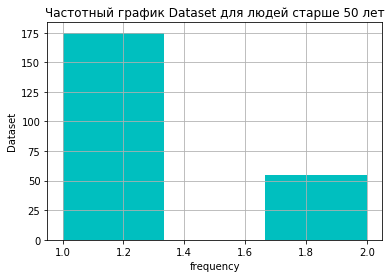

In [65]:
n, bins, patches = plt.hist(data[data['Age']>=50]['Dataset'],3, facecolor='c')

plt.xlabel('frequency')
plt.ylabel('Dataset')
plt.title('Частотный график Dataset для людей старше 50 лет')
plt.grid(True)
plt.show()

Судя по графикам и если я правильно интерпретировал значения dataset, это какая-то молодая болезнь. Проверим это простым счетом

In [77]:
#проверим простым счетом
ill_50plus = data[ (data['Age']>=50) & (data['Dataset']==2) ]['Dataset']
ill_50menos = data[ (data['Age']<50) & (data['Dataset']==2) ]['Dataset']
print('Число больных старше 50 лет равно', len(ill_50plus))
print('Число больных младше 50 лет равно', len(ill_50menos))
print('---')

Число больных старше 50 лет равно 55
Число больных младше 50 лет равно 112
---


Настало время посчитать среднее и квартили

In [84]:
more_50 = data[ (data['Age']>=50) ]['Dataset']
less_50 = data[ (data['Age']<50) ]['Dataset']

print(more_50.mean())
print(less_50.mean())

1.2391304347826086
1.3172804532577904


In [85]:
more_50.quantile([.1, .25, .5, .75]) 

0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
Name: Dataset, dtype: float64

In [86]:
less_50.quantile([.1, .25, .5, .75]) 

0.10    1.0
0.25    1.0
0.50    1.0
0.75    2.0
Name: Dataset, dtype: float64

### Выводы:
* Среднее для людей старше 50 лет ниже, чем для младших. Значит признак болезни '2' встречается реже
* В четвертом квартиле для людей старше 50 лет есть здоровые, для людей младше - нет


### Задание 5
Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [87]:
ill_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(ill_bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012505, pvalue=3.180002804533163e-64)

* p стремится к нулю, отвергаем нулевую гипотезу, total_bilirubin и наличие диагноза связаны
* t равна -27.7 что говорит о существенном различии среднего значения билирубина у пациентов с диагнозом и у общего набора пациентов

### Задание 6
Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [88]:
ill_bilirubin = data[data['Dataset']==2]['Total_Bilirubin']
notill_bilirubin = data[data['Dataset']==1]['Total_Bilirubin']

stats.ttest_ind(ill_bilirubin, notill_bilirubin)

Ttest_indResult(statistic=-5.441441126834863, pvalue=7.801430929364345e-08)

* p-value снова стремится к нулю. Между группами есть различия
* t равен -5.4 . Это означает что различия в группах приводят к различию в значениях, уровень билирубина у пациентов с диагнозом и без - разный

### Задание 7
Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [98]:
age_less_30 = data[ data['Age']<30 ]['Dataset']
age_30_55 = data[ (data['Age']>=30) & (data['Age']<55) ]['Dataset']
age_more_55 = data[ data['Age']>=55 ]['Dataset']


stats.f_oneway(age_less_30, age_30_55, age_more_55)

F_onewayResult(statistic=9.375048806025259, pvalue=9.837730889092287e-05)

+ p-value стремится к нулю, что говорит о том, что между выборками есть различия
+ t равен 9.4 что говорит о том, что различия материализуются в различия в значениях. Ниже расчет средних

In [97]:
#Это какая-то очень молодая болезнь
print('среднее равно', round(age_less_30.mean(), 2) )
print('среднее равно', round(age_30_55.mean(), 2), )
print('среднее равно', round(age_more_55.mean(), 2), )

среднее равно 1.46
среднее равно 1.25
среднее равно 1.25


Вопросы задавать на почту yustiks@gmail.com